Author: Niamh Hogan

# **Suicide Mortality in Ireland:**  
# **Demographic Trends and EU Comparison (2012–2016)**

## **Project Overview**

In [200]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. **Data Acquisition and Loading**  

I am loading multiple datasets from the Central Statistics Office, World Health Organization & Eurostat to support demographic and geographic analysis:

- Irish suicide mortality by year, age group, and sex ([Central Statistics Office – VSA35](https://data.cso.ie/#))

- Irish suicide mortality by county and sex ([Central Statistics Office – VSA112](https://data.cso.ie/#))

- EU suicide mortality by country and sex ([World Health Organization](https://gateway.euro.who.int/en/indicators/hfamdb_761-deaths-suicide-and-intentional-self-harm/#id=31291))

- EU population data for rate standardisation ([Eurostat](https://ec.europa.eu/eurostat/databrowser/view/demo_pjan/default/table))

I am inspecting each dataset immediately after loading to confirm successful import, expected structure, and consistency with source documentation.

**1.1 Irish Deaths by Year, Age, and Sex**

I am using this dataset to examine temporal and demographic patterns in suicide mortality in Ireland. After loading the CSV file into a pandas DataFrame, I am reviewing the first rows and column structure to verify that years, age groups, sexes, and death counts have been recorded correctly.

In [201]:
irish_age_sex_df = pd.read_csv(
    "./data/irishdata_year_age_sex_cso.csv"
)

irish_age_sex_df.head()

,Statistic Label,Year,Sex,Cause of Death,Age Group at Death,UNIT,VALUE
0,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,Under 1 year,Number,NaN
1,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,1 - 4 years,Number,NaN
2,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,5 - 9 years,Number,NaN
3,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,10 - 14 years,Number,8.0
4,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,15 - 19 years,Number,27.0


**1.2 Irish Deaths by County and Sex**

I am using county-level mortality data to support geographic comparison within Ireland. After loading the dataset, I am checking that county names, years, and death counts are correctly formatted and suitable for aggregation and comparison.

In [202]:
irish_counties_df = pd.read_csv(
    "./data/irishdata_year_counties_sex_cso.csv"
)

irish_counties_df.head(3)

,Statistic Label,Year,Sex,County,Cause of Death,UNIT,VALUE
0,Deaths Occuring,2015,Both sexes,Ireland,Intentional self-harm (X60-X84),Number,500.0
1,Deaths Occuring,2015,Both sexes,Carlow County Council,Intentional self-harm (X60-X84),Number,7.0
2,Deaths Occuring,2015,Both sexes,Dublin City Council,Intentional self-harm (X60-X84),Number,54.0


**1.3 EU Deaths by Country and Sex**  

I am using European suicide mortality data from the World Health Organization to compare countries and place Irish trends in an international context. As the source file contains extensive metadata, I am skipping non-data rows during import. I am then confirming that country codes, years, and death counts have loaded as expected.

In [203]:
eu_deaths_df = pd.read_csv(
    "./data/who_eu_deaths.csv",
    skiprows=30,
    low_memory=False,
)

eu_deaths_df.head(3)

,COUNTRY,COUNTRY_GRP,AGE_GRP_LIST,SEX,SUBNATIONAL_MDB,YEAR,VALUE
0,ALB,NaN,TOTAL,FEMALE,NaN,1987.0,25.0
1,ALB,NaN,TOTAL,FEMALE,NaN,1988.0,22.0
2,ALB,NaN,TOTAL,FEMALE,NaN,1989.0,15.0


**1.4 EU Population**  

I am loading EU population data from Eurostat to allow death counts to be interpreted relative to population size. Including population data supports fair cross-country comparisons and avoids misleading conclusions based solely on absolute death counts ([Health Knowledge](https://www.healthknowledge.org.uk/e-learning/epidemiology/specialists/standardisation?utm_source=chatgpt.com)).

In [204]:
eu_pop_df = pd.read_csv(
    "./data/eu_pop_2012_2022.csv"
)

eu_pop_df.head(3)

,Time,geo,Value,age,sex,unit
0,2012,AT,8408121,TOTAL,T,NR
1,2012,BE,11075889,TOTAL,T,NR
2,2012,BG,7327224,TOTAL,T,NR


## **2. Data Cleaning and Preparation**  

In this section, I clean and transform each dataset to ensure consistency, accuracy, and suitability for analysis.

### **2.1 Cleaning Irish Age and Sex Mortality Data**  

I am preparing the Irish age and sex mortality dataset for analysis by carrying out the following steps:

- Removing descriptive metadata columns that are not required for numerical analysis, improving clarity and reducing unnecessary complexity.

- Reviewing the dataset structure to confirm variable types, identify missing values, and ensure the data are suitable for analysis.

- Converting death counts to pandas’ nullable integer type to allow accurate aggregation while preserving missing-value information.

- Converting age group labels into numeric values to support quantitative analysis, including handling special cases such as "Under 1 year", open-ended age ranges, and the "All ages" category.

- Removing rows with missing death counts, as these observations cannot contribute meaningfully to statistical summaries.

- Aggregating the cleaned data into a pivot table summarising deaths by year, age group, and sex to support efficient trend analysis and visualisation.

**Removing Unnecessary Columns**

I am simplifying the dataset by removing columns that contain descriptive metadata rather than analytical variables. The Statistic Label, Cause of Death, and UNIT fields do not contribute to numerical analysis, and removing them reduces noise and improves readability. Retaining only relevant variables allows subsequent cleaning and aggregation steps to be carried out more efficiently. 

In [205]:
DROP_COLS_AGE_SEX = ["Statistic Label", "Cause of Death", "UNIT"]

irish_age_sex_df.drop(columns=DROP_COLS_AGE_SEX, inplace=True)

print(irish_age_sex_df.head(3))

   Year         Sex Age Group at Death  VALUE
0  2007  Both sexes       Under 1 year    NaN
1  2007  Both sexes        1 - 4 years    NaN
2  2007  Both sexes        5 - 9 years    NaN


**Inspecting Dataset Structure**

I am reviewing the structure of the cleaned dataset to confirm the number of observations, variable types, and the presence of missing values. This step allows me to verify that the data have loaded correctly and to identify potential issues, such as unexpected null values or inappropriate data types, before proceeding with further transformations. 

In [206]:
print(irish_age_sex_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                960 non-null    int64  
 1   Sex                 960 non-null    object 
 2   Age Group at Death  960 non-null    object 
 3   VALUE               782 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.1+ KB
None


**Converting Data Types**

I am converting the `VALUE` column, which represents the number of deaths, to pandas’ nullable integer type. This supports accurate aggregation and summarisation while preserving information about missing values. Using a nullable integer type ensures that missing observations are not silently coerced into incorrect values during analysis ([GeeksforGeeks](https://www.geeksforgeeks.org/pandas/nullable-integer-data-type-in-pandas/)).

In [207]:
# Convert VALUE to integer type
irish_age_sex_df["VALUE"] = irish_age_sex_df["VALUE"].astype("Int64")

print(irish_age_sex_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                960 non-null    int64 
 1   Sex                 960 non-null    object
 2   Age Group at Death  960 non-null    object
 3   VALUE               782 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 31.1+ KB
None


**Inspecting and Processing Age Group Values**

I am examining the unique values in the Age Group at Death column to understand the range and format of age categories present in the dataset ([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.Index.unique.html#pandas.Index.unique)). 

In [208]:
print(irish_age_sex_df["Age Group at Death"].unique())

['Under 1 year' '1 - 4 years' '5 - 9 years' '10 - 14 years'
 '15 - 19 years' '20 - 24 years' '25 - 29 years' '30 - 34 years'
 '35 - 39 years' '40 - 44 years' '45 - 49 years' '50 - 54 years'
 '55 - 59 years' '60 - 64 years' '65 - 69 years' '70 - 74 years'
 '75 - 79 years' '80 - 84 years' '85 years and over' 'All ages']


Above shows that the column contains a mixture of bounded ranges, open-ended ranges, and descriptive labels, which require standardisation before numerical analysis.

To address this, I am defining a custom function to convert age group strings into numeric values suitable for aggregation:

- I am representing “Under 1 year” as 0 to reflect infancy.

- I am using the lower bound for bounded age ranges (for example, 15 for “15–19 years”).

- I am using the lower bound for open-ended ranges such as “85 years and over”.

- I am temporarily converting “All ages” to a missing value, as it represents an aggregate rather than a specific age group ([NumPy](https://numpy.org/doc/stable/reference/constants.html#numpy.nan); [Pandas](https://docs.python.org/3/library/stdtypes.html); [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-string-split/)). 

I am then applying the age_to_int function across the column and converting the result to a nullable integer type to support numerical operations while retaining missing values.

In [209]:
def age_to_int(age_str):
    if age_str == "All ages":
        return np.nan
    if age_str == "Under 1 year":
        return 0
    if "and over" in age_str:
        return int(age_str.split()[0])
    return int(age_str.split(" - ")[0])

# Apply & convert to numeric values
irish_age_sex_df["Age Group at Death"] = (
    irish_age_sex_df["Age Group at Death"]
    .apply(age_to_int)
    .astype("Int64")
)

**Handling the “All ages” Category**  

I am assigning a representative midpoint value to observations originally labelled “All ages” so that these rows can be included in summaries, pivot tables, and visualisations. I am using a midpoint value of 42 as an approximate representation across the lifespan. This approach was selected following guidance obtained using ChatGPT, which recommended the use of a midpoint value when working with aggregated age categories in exploratory analysis.

AI utilised: ChatGPT  
Query: How should an “All ages” category be handled numerically after conversion to NaN in Python analysis?  
Link to query: https://chatgpt.com/share/694ac1d5-86f0-8011-bddb-4f6d0aa88329

In [210]:
ALL_AGES_MIDPOINT = 42
irish_age_sex_df["Age Group at Death"] = (
    irish_age_sex_df["Age Group at Death"]
    .fillna(ALL_AGES_MIDPOINT)
)

# Verify age group conversion
print(irish_age_sex_df["Age Group at Death"].unique())

<IntegerArray>
[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 42]
Length: 20, dtype: Int64


**Handling Missing Values**

I am checking the dataset for missing, empty, or whitespace-only values to ensure data quality prior to analysis. This includes identifying standard missing values as well as values that may appear non-null but contain no meaningful information ([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html); [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-map-function/); [StackOverFlow](https://stackoverflow.com/questions/39388950/logical-or-bitwise-or-in-pandas-data-frame)). 

In [211]:
# Check for missing, empty, or whitespace-only values
missing_values_check = (
    irish_age_sex_df.isna()
    | irish_age_sex_df.map(lambda x: str(x).strip() == "")
).sum()

print(missing_values_check)

Year                    0
Sex                     0
Age Group at Death      0
VALUE                 178
dtype: int64


I am identifying missing values in the `VALUE` column (178) and removing these rows, as observations without recorded death counts cannot contribute meaningfully to statistical analysis. Before removal, I am converting pandas’ nullable missing values to standard NaN to ensure consistent handling ([Pandas](https://pandas.pydata.org/docs/user_guide/missing_data.html)).

In [212]:
irish_age_sex_df["VALUE"] = irish_age_sex_df["VALUE"].replace({pd.NA: np.nan})

irish_age_sex_df = irish_age_sex_df.dropna(subset=["VALUE"])

**Creating and Saving Pivot Table for Analysis**

I am summarising the cleaned `Irish Age and Sex Mortality dataset` into a pivot table to facilitate trend analysis and visualisation ([GeeksforGeeks](https://www.geeksforgeeks.org/python/python-pandas-pivot_table/]); [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)). This involves:

- Aggregating death counts (VALUE) by year to track temporal changes.

- Organising the data by age group and sex as columns, so each combination has its own column in the table.

- Using sum as the aggregation function to combine multiple entries for the same year/age/sex combination.

- Replacing any missing values with 0 to indicate that no deaths were recorded for that category.

I am then saving the pivot table to a CSV file in the data folder so that it can be reused in further analysis and visualisations without having to repeat the cleaning and aggregation steps.

In [213]:
# Create pivot table for analysis
irish_deaths_by_age_sex_pivot = pd.pivot_table(
    irish_age_sex_df,
    values="VALUE",
    index="Year",
    columns=["Age Group at Death", "Sex"],
    aggfunc="sum"
).fillna(0)

print(irish_deaths_by_age_sex_pivot.head(3))

# Save cleaned pivot table
irish_deaths_by_age_sex_pivot.to_csv(
    "./data/irish_deaths_by_age_sex_pivot.csv", index=True
)

Age Group at Death         10                     15                     20  \
Sex                Both sexes Female Male Both sexes Female Male Both sexes   
Year                                                                          
2007                        8      1    7         27      7   20         69   
2008                        4      1    3         47     18   29         51   
2009                        5      3    2         38      7   31         48   

Age Group at Death                     25  ...   70         75              \
Sex                Female Male Both sexes  ... Male Both sexes Female Male   
Year                                       ...                               
2007                    9   60         69  ...   15          7      2    5   
2008                    9   42         72  ...    9          7      3    4   
2009                    7   41         70  ...    7          8      1    7   

Age Group at Death         80                     85    

### **2.2 Cleaning Irish County Mortality Data**

**Removing Unnecessary Columns**

I am simplifying the dataset by removing columns containing descriptive metadata (Statistic Label, Cause of Death, UNIT), which do not contribute to numerical analysis. This makes the dataset easier to read and ensures that subsequent cleaning and aggregation steps focus only on relevant variables

In [214]:
drop_col_list2= ["Statistic Label", "Cause of Death", "UNIT"]

irish_counties_df.drop(columns=drop_col_list2, inplace=True)

print(irish_counties_df.head(3))

   Year         Sex                 County  VALUE
0  2015  Both sexes                Ireland  500.0
1  2015  Both sexes  Carlow County Council    7.0
2  2015  Both sexes    Dublin City Council   54.0


**Inspecting Dataset Structure**

I am reviewing the structure of the cleaned dataset to verify the number of observations, variable types, and the presence of missing values. This allows me to confirm that the data loaded correctly and to identify any potential issues before further processing.

In [215]:
print(irish_counties_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    768 non-null    int64  
 1   Sex     768 non-null    object 
 2   County  768 non-null    object 
 3   VALUE   745 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.1+ KB
None


**Converting Data Types**

I am converting the `VALUE` column, representing the number of deaths, to a nullable integer type. This ensures accurate aggregation, preserves missing values, and allows arithmetic operations without errors.

In [216]:
irish_counties_df["VALUE"] = irish_counties_df["VALUE"].astype("Int64")

print(irish_counties_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    768 non-null    int64 
 1   Sex     768 non-null    object
 2   County  768 non-null    object
 3   VALUE   745 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 24.9+ KB
None


**Handling Missing Values**

I am checking the dataset for missing, empty, or whitespace-only values to ensure data quality.

In [217]:
# Check for missing, empty, or whitespace-only values
missing_values_check = (
    irish_counties_df.isna()
    | irish_counties_df.map(lambda x: str(x).strip() == "")
).sum()

print(missing_values_check)

Year       0
Sex        0
County     0
VALUE     23
dtype: int64


 The `VALUE` column contains 23 missing entries, which I remove because observations without recorded deaths cannot be used in analysis. After this step, all columns have valid data, ensuring clean input for pivoting.

In [218]:
irish_counties_df = irish_counties_df.dropna(subset=["VALUE"])

irish_counties_df.apply(
    lambda col: col.isna().sum()
    + (col == "").sum()
    + col.astype(str).str.strip().eq("").sum()
)

Year      0
Sex       0
County    0
VALUE     0
dtype: int64

**Creating and Saving a Pivot Table**

I am summarising the cleaned Irish County Mortality dataset into a pivot table to facilitate analysis of trends by county and sex. This involves:

- Aggregating death counts (VALUE) by year to track temporal changes.

- Organising the data by county and sex as columns to enable comparison across regions and demographic groups.

- Using sum as the aggregation function to combine multiple entries for the same year/county/sex combination.

I am saving the resulting pivot table to a CSV file in the data folder so that it can be reused in further analysis and visualisations without repeating cleaning steps.

In [219]:
irish_county_deaths_pivot = pd.pivot_table(
    irish_counties_df,
    values="VALUE",
    index="Year",
    columns=["County", "Sex"],
    aggfunc="sum",
)

print(irish_county_deaths_pivot.head(3))

# Save cleaned pivot table to folder
irish_county_deaths_pivot.to_csv(
    "./data/irish_county_deaths_pivot.csv", index=True
)

County Carlow County Council             Cavan County Council              \
Sex               Both sexes Female Male           Both sexes Female Male   
Year                                                                        
2015                       7      3    4                    7      1    6   
2016                       9      1    8                   16      5   11   
2017                       8      3    5                   12      2   10   

County Clare County Council             Cork City Council  ...  \
Sex              Both sexes Female Male        Both sexes  ...   
Year                                                       ...   
2015                     17      3   14                14  ...   
2016                     15      3   12                24  ...   
2017                     20      2   18                13  ...   

County Waterford City & County Council Westmeath County Council              \
Sex                               Male               Both sex

### **2.3 Cleaning EU Mortality Data**

**Removing Unnecessary Columns**

I am dropping columns (COUNTRY_GRP, AGE_GRP_LIST, SUBNATIONAL_MDB) that contain metadata not relevant for analysis. This simplifies the dataset and keeps only the variables required for calculating mortality trends across countries and years.

In [220]:
drop_col_list3= ["COUNTRY_GRP", "AGE_GRP_LIST", "SUBNATIONAL_MDB"]

eu_deaths_df.drop(columns=drop_col_list3, inplace=True)

print(eu_deaths_df.head(3))

  COUNTRY     SEX    YEAR  VALUE
0     ALB  FEMALE  1987.0   25.0
1     ALB  FEMALE  1988.0   22.0
2     ALB  FEMALE  1989.0   15.0


**Filtering by Sex**

I am retaining only rows where SEX is `“ALL”` to focus on total mortality counts rather than sex-specific deaths ensuring a consistent dataset for cross-country comparison.

In [221]:
eu_deaths_df = eu_deaths_df[eu_deaths_df["SEX"] == "ALL"]

print(eu_deaths_df.head(3))

     COUNTRY  SEX    YEAR  VALUE
4011     ALB  ALL  1987.0   73.0
4012     ALB  ALL  1988.0   63.0
4013     ALB  ALL  1989.0   68.0


**Selecting EU Member States**

I am keeping only EU member states in the dataset by filtering the `COUNTRY` column against a predefined list of EU countries. This ensures that the analysis reflects trends within the EU and excludes non-member countries. I then print out the countrys retained in alphabetical order for readability. 

In [222]:
# EU member states
eu_members = [
    "AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "FIN", "FRA",
    "DEU", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX", "MLT", "NLD",
    "POL", "PRT", "ROU", "SVK", "SVN", "ESP", "SWE"
]

eu_deaths_df = eu_deaths_df[eu_deaths_df["COUNTRY"].isin(eu_members)]

# Print countries alphabetically 
countries = sorted(eu_deaths_df["COUNTRY"].unique())

print(countries)

['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']


**Limiting Years for Analysis**

I am filtering the dataset to include only the years 2012–2016 because other years contain too many missing values. This ensures the mortality rates I calculate are based on complete and comparable data across countries.

In [223]:
eu_deaths_df = eu_deaths_df[
    (eu_deaths_df["YEAR"] >= 2012) & (eu_deaths_df["YEAR"] <= 2016)
]

eu_deaths_df["YEAR"].unique()

array([2012., 2013., 2014., 2015., 2016.])

In [224]:
# Checking Data Types
print(eu_deaths_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 4121 to 5875
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  129 non-null    object 
 1   SEX      129 non-null    object 
 2   YEAR     129 non-null    float64
 3   VALUE    129 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB
None


**Converting Data Types**

I am converting `VALUE` and `YEAR` to a nullable integer type to support numerical analysis and aggregation. This allows accurate calculations, sorting, and visualisation while preserving any missing values.

In [225]:
# Convert VALUE to int
eu_deaths_df["VALUE"] = eu_deaths_df["VALUE"].astype("Int64")

# Convert YEAR to int
eu_deaths_df["YEAR"] = eu_deaths_df["YEAR"].astype("Int64")

print(eu_deaths_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 4121 to 5875
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COUNTRY  129 non-null    object
 1   SEX      129 non-null    object
 2   YEAR     129 non-null    Int64 
 3   VALUE    129 non-null    Int64 
dtypes: Int64(2), object(2)
memory usage: 5.3+ KB
None


**Checking for Missing or Invalid Data**

I am checking the dataset for NaN values, empty strings, or cells containing only whitespace. After this step, the dataset contains no missing or invalid values, ensuring clean input for further analysis.

In [226]:
# Check for missing, empty, or whitespace-only values
missing_values_check = (
    eu_deaths_df.isna()
    | eu_deaths_df.map(lambda x: str(x).strip() == "")
).sum()

print(missing_values_check)

COUNTRY    0
SEX        0
YEAR       0
VALUE      0
dtype: int64


### **2.4 Cleaning EU Population Data**

**Removing Unnecessary Columns**

I am dropping columns (age, sex, unit) that are not relevant for this analysis. This keeps only the total population counts by country and year, simplifying the dataset for rate calculations and cross-country comparisons.

In [227]:
drop_col_list4= ["age", "sex", "unit"]

eu_pop_df.drop(columns=drop_col_list4, inplace=True)

# sanity check
print(eu_pop_df.head(3)) 

   Time geo     Value
0  2012  AT   8408121
1  2012  BE  11075889
2  2012  BG   7327224


**Filtering Years for Analysis**

I am keeping only rows where Time (year) is between 2012 and 2016. This aligns the population data with the EU mortality dataset, ensuring that mortality rates are calculated using population counts from the same period.

In [228]:
eu_pop_df = eu_pop_df[(eu_pop_df["Time"] >= 2012) & (eu_pop_df["Time"] <= 2016)]

eu_pop_df["Time"].unique()

array([2012, 2013, 2014, 2015, 2016])

**Inspecting Dataset Structure**

I am reviewing the dataset structure to confirm that the data types are appropriate and that no missing values exist in the selected columns. This guarantees that the dataset is clean and ready for merging with mortality data and subsequent analysis.

In [229]:
print(eu_pop_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    135 non-null    int64 
 1   geo     135 non-null    object
 2   Value   135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.2+ KB
None


### **2.5 Standardising EU Mortality Rates**  

**Renaming Columns for Clarity**

I am renaming the columns in the population dataset from geo → COUNTRY, Time → YEAR, and Value → POPULATION. This makes the dataset easier to understand and aligns the column names with the deaths dataset to simplify merging.

In [230]:
eu_pop_df.rename(
    columns={"geo": "COUNTRY", "Time": "YEAR", "Value": "POPULATION"},
    inplace=True,
)

**Harmonising Country Codes Between Datasets**

I am printing all unique country codes in both the deaths dataset (eu_deaths_df) and the population dataset (eu_pop_df). This allows me to identify differences in how countries are coded.

- The deaths dataset uses 3-letter ISO codes (e.g., "AUT", "BEL").

- The population dataset uses 2-letter ISO codes (e.g., "AT", "BE").

In [231]:
print(sorted(eu_deaths_df["COUNTRY"].unique()))
print(sorted(eu_pop_df["COUNTRY"].unique()))

['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']
['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']


I am defining a dictionary (country_code_map) to convert the 3-letter codes in the deaths dataset to the corresponding 2-letter codes used in the population dataset. This ensures that country identifiers match exactly across both datasets.

In [232]:
country_code_map = {
    "AUT": "AT", "BEL": "BE", "BGR": "BG", "CYP": "CY", "CZE": "CZ",
    "DEU": "DE", "DNK": "DK", "ESP": "ES", "EST": "EE", "FIN": "FI",
    "FRA": "FR", "GRC": "EL", "HRV": "HR", "HUN": "HU", "IRL": "IE",
    "ITA": "IT", "LTU": "LT", "LUX": "LU", "LVA": "LV", "MLT": "MT",
    "NLD": "NL", "POL": "PL", "PRT": "PT", "ROU": "RO", "SVK": "SK",
    "SVN": "SI", "SWE": "SE"
}

**Applying the Mapping**  

I am using pandas.Series.map() to apply the mapping to the COUNTRY column in the deaths dataset ([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)). After this step, both datasets use the same 2-letter country codes, which allows me to merge them correctly on COUNTRY and YEAR without any mismatches.

In [233]:
eu_deaths_df["COUNTRY"] = eu_deaths_df["COUNTRY"].map(country_code_map)

**Merging EU Deaths with Population and Calculating Mortality Rates**  

**1. Merging datasets** 
I am combining the deaths dataset (eu_deaths_df) with the population dataset (eu_pop_df) using pandas.merge() ([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)). 
- I am keeping only the columns `COUNTRY, YEAR, and POPULATION` from the population dataset to simplify the merge.  
- I am merging on `COUNTRY and YEAR`, which ensures that each death count aligns with the correct population for that country and year.  
- I am using a left join (how="left") to keep all rows from the deaths dataset, even if population data is missing.

**2. Calculating mortality rate per 100,000 population**  
I am creating a new column, `MORTALITY_RATE`, by dividing the number of deaths (VALUE) by the population (POPULATION) and multiplying by 100,000.
This standardisation allows me to compare mortality rates across countries of different sizes.
Without this step, countries with larger populations would appear to have disproportionately higher deaths.

**3. Inspecting results**  
I am using .head(10) to check the first 10 rows of the merged dataset and confirm that:

- Each row has the correct country, year, death count, population, and calculated mortality rate.
- The data is now ready for analysis and visualisation.

In [234]:
eu_merged_df = eu_deaths_df.merge(
    eu_pop_df[["COUNTRY", "YEAR", "POPULATION"]],
    on=["COUNTRY", "YEAR"],
    how="left",
)

# Calculate mortality rate per 100,000 population
eu_merged_df["MORTALITY_RATE"] = (
    eu_merged_df["VALUE"] / eu_merged_df["POPULATION"]
) * 100000

eu_merged_df.head(10) 

,COUNTRY,SEX,YEAR,VALUE,POPULATION,MORTALITY_RATE
0,AT,ALL,2012,1275,8408121,15.163911
1,AT,ALL,2013,1291,8451860,15.274744
2,AT,ALL,2014,1313,8507786,15.432922
3,AT,ALL,2015,1249,8584926,14.548757
4,AT,ALL,2016,1198,8700471,13.769369
5,BE,ALL,2012,2023,11075889,18.2649
6,BE,ALL,2013,1895,11137974,17.013866
7,BE,ALL,2014,1898,11180840,16.975469
8,BE,ALL,2015,1866,11237274,16.605451
9,BE,ALL,2016,1905,11311117,16.841838


**Handling Missing Values**

I am checking the merged dataset for missing, empty, or whitespace-only values to ensure data quality.

In [235]:
# Check for missing, empty, or whitespace-only values
missing_values_check = (
    eu_merged_df.isna()
    | eu_merged_df.map(lambda x: str(x).strip() == "")
).sum()

print(missing_values_check)

COUNTRY           0
SEX               0
YEAR              0
VALUE             0
POPULATION        0
MORTALITY_RATE    0
dtype: int64


**Creating a Pivot Table for EU Mortality Rates**

**1. Pivoting the data**  
I am using pd.pivot_table() to reorganize the merged EU dataset (eu_merged_df) into a format that is easier to analyse and visualise.
- The values parameter is set to "MORTALITY_RATE", so the pivot table will show mortality rates.
- The index is "YEAR", meaning each row represents a year from 2012–2016.
- The columns are "COUNTRY", so each column corresponds to a different EU country.  
- After pivoting, I use .fillna(0) to replace any missing values with 0 to indicate *no data recorded* as zero for analysis. This ensures that every year-country combination has a numeric value, allowing consistent calculations, comparisons, and visualizations without errors.
- This creates a table where I can quickly compare mortality rates across countries for the same year.

**2. Inspecting the results**  
I am using .head(10) to check the first 10 rows of the pivot table. This ensures that:
- The pivot table has the correct structure.
- Mortality rates are correctly aligned by country and year.

**3. Saving the pivot table**  
I am saving the pivot table to a CSV file (eu_mortality_rate_2012_2016.csv) so that it can be reused in later analysis & visualisation without having to repeat all the previous steps.

In [236]:
eu_mortality_pivot = pd.pivot_table(
    eu_merged_df,
    values="MORTALITY_RATE",
    index="YEAR",
    columns="COUNTRY",
).fillna(0)

eu_mortality_pivot.to_csv("./data/eu_mortality_rate_2012_2016.csv", index=True) 

eu_mortality_pivot.head(5)

COUNTRY,AT,BE,BG,CY,CZ,DE,DK,EE,EL,ES,...,LU,LV,MT,NL,PL,PT,RO,SE,SI,SK
YEAR,,,,,,,,,,,,,,,,,,,,,
2012,15.163911,18.2649,11.900824,4.176281,15.677584,12.312036,11.844783,17.883864,4.582188,7.559023,...,9.717006,21.664573,5.987364,10.477965,16.721928,10.190407,12.415409,12.137695,21.406026,10.565618
2013,15.274744,17.013866,9.996451,5.215251,14.957981,12.513079,10.887748,16.512975,0.0,8.284694,...,7.448249,18.87515,5.2199,11.049148,16.328392,10.024858,12.087867,12.840244,21.662884,11.384562
2014,15.432922,16.975469,10.144078,5.116089,14.154687,12.639991,11.177781,18.315589,5.170769,8.409372,...,12.18891,19.085991,7.473911,10.927378,15.605825,11.70997,11.069161,11.902708,18.825036,10.210584
2015,14.548757,16.605451,9.630581,4.646592,13.133079,12.411707,9.965166,14.830363,4.871976,7.75863,...,11.368521,19.435113,7.748316,11.07053,14.253157,10.889724,11.177291,12.095589,20.456897,0.0
2016,13.769369,16.841838,9.598258,4.167805,12.469391,11.971911,10.109946,13.906367,4.497509,7.688681,...,7.462052,18.486945,5.337663,11.148988,12.302722,9.4613,9.96428,11.511502,17.973169,7.168852


## **3. 🇮🇪 Irish Suicide Mortality Analysis**

### **3.1 National Trends by Age & Sex**

In [237]:
irish_national_mortality = pd.read_csv('./data/irish_deaths_by_age_sex_pivot.csv',
    header=[0,1],  
    index_col=0    
) 

irish_national_mortality.head(5)

Age Group at Death         10                     15                     20  \
Sex                Both sexes Female Male Both sexes Female Male Both sexes   
Year                                                                          
2007                        8      1    7         27      7   20         69   
2008                        4      1    3         47     18   29         51   
2009                        5      3    2         38      7   31         48   
2010                        4      1    3         32      8   24         58   
2011                        0      0    0         33      6   27         64   

Age Group at Death                     25  ...   70         75              \
Sex                Female Male Both sexes  ... Male Both sexes Female Male   
Year                                       ...                               
2007                    9   60         69  ...   15          7      2    5   
2008                    9   42         72  ...    9          7      3    4   
2009                    7   41         70  ...    7          8      1    7   
2010                    5   53         57  ...    6          4      1    3   
2011                   10   54         65  ...    8          6      0    6   

Age Group at Death         80                     85              
Sex                Both sexes Female Male Both sexes Female Male  
Year                                                              
2007                        4      1    3          0      0    0  
2008                        3      1    2          1      0    1  
2009                        2      1    1          0      0    0  
2010                        4      1    3          1      1    0  
2011                        4      0    4          1      0    1  

[5 rows x 51 columns]

### **3.1.1 Overall Suicide Mortality Trends in Ireland (2007–2022)**  

I examine how suicide mortality changes over time across Ireland, looking at national trends to identify overall increases, decreases, or stable periods in deaths from 2007 to 2022.

Research Question:  
How has suicide mortality changed nationally over time?

**Trends in Total Suicide Deaths per Year**  

In [238]:
total_col = ("42", "Both sexes")

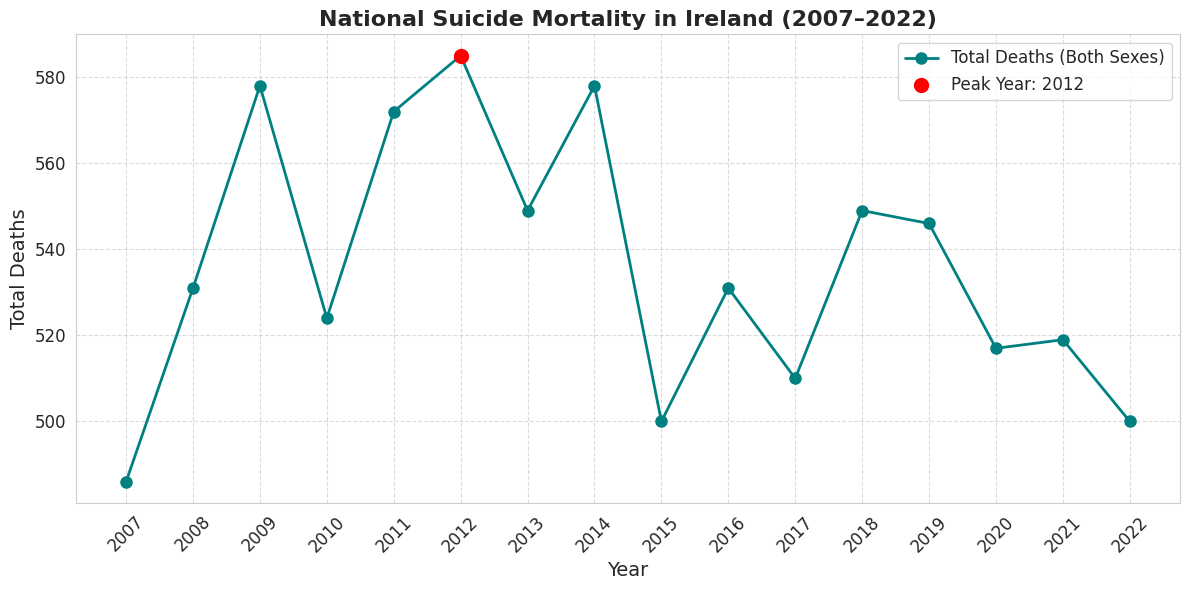

In [239]:
sns.set_style("whitegrid")

peak_year = irish_national_mortality[total_col].idxmax()
peak_value = irish_national_mortality[total_col].max() 

plt.figure(figsize=(12, 6))

plt.plot(
    irish_national_mortality.index,
    irish_national_mortality[total_col],
    marker="o",
    markersize=8,
    linewidth=2,
    color="teal",
    label="Total Deaths (Both Sexes)",
)

plt.scatter(peak_year, peak_value, color="red", s=100, zorder=5, label=f"Peak Year: {peak_year}")

plt.title(
    "National Suicide Mortality in Ireland (2007–2022)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Deaths", fontsize=14)
plt.xticks(irish_national_mortality.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

**Year-on-Year Change in National Suicide Mortality**  

https://www.w3schools.com/python/pandas/ref_df_diff.asp

In [240]:
irish_national_mortality["YoY_Change"] = irish_national_mortality[total_col].diff()

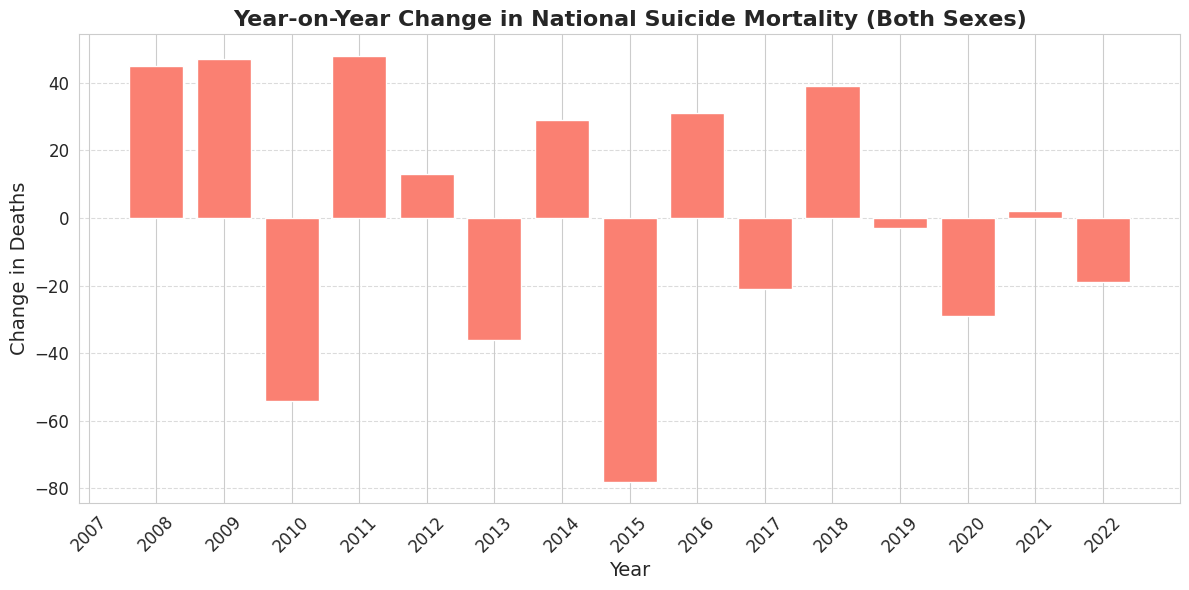

In [241]:
plt.figure(figsize=(12, 6))
plt.bar(
    irish_national_mortality.index,
    irish_national_mortality["YoY_Change"],
    color="salmon",
)

plt.title(
    "Year-on-Year Change in National Suicide Mortality (Both Sexes)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Change in Deaths", fontsize=14)
plt.xticks(irish_national_mortality.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

**Smoothed Mortality Trends (3-Year Rolling Average)**  

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html  

https://www.geeksforgeeks.org/python/plot-multiple-lines-in-matplotlib/

In [242]:
irish_national_mortality["Rolling_3yr_Avg"] = (
    irish_national_mortality[total_col].rolling(window=3, min_periods=1).mean()
)

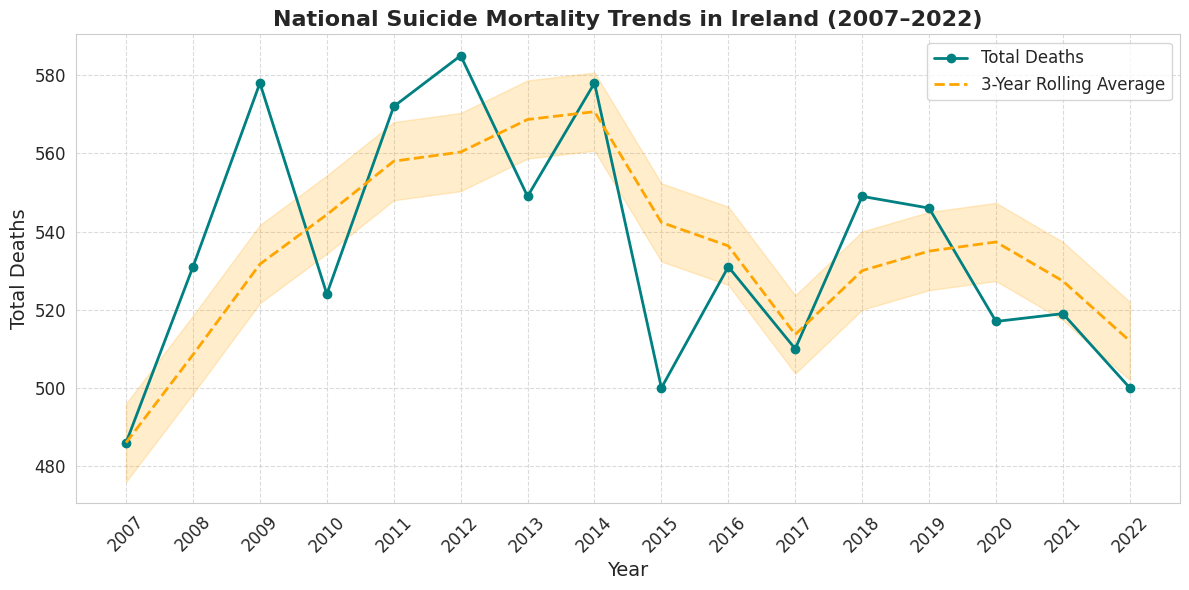

In [243]:
plt.figure(figsize=(12, 6))

plt.plot(
    irish_national_mortality.index,
    irish_national_mortality[total_col],
    marker="o",
    linewidth=2,
    color="teal",
    label="Total Deaths",
)

plt.plot(
    irish_national_mortality.index,
    irish_national_mortality["Rolling_3yr_Avg"],
    linestyle="--",
    color="orange",
    linewidth=2,
    label="3-Year Rolling Average",
)

plt.fill_between(
    irish_national_mortality.index,
    irish_national_mortality["Rolling_3yr_Avg"] - 10,
    irish_national_mortality["Rolling_3yr_Avg"] + 10,
    color="orange",
    alpha=0.2,
)

plt.title(
    "National Suicide Mortality Trends in Ireland (2007–2022)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Deaths", fontsize=14)
plt.xticks(irish_national_mortality.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

### **3.1.2 Sex-Based Differences in Suicide Mortality**  

Here, I examine differences in suicide mortality patterns between males and females to understand whether trends vary by sex over time.

Research Question:  
How do trends differ between males and females?

**Extracting National Death Counts by Sex**

I first isolate the “Both sexes”, “Male”, and “Female” totals using the All-Ages (42) category.

In [244]:
female_total = irish_deaths_by_age_sex_pivot[(42, "Female")]
male_total = irish_deaths_by_age_sex_pivot[(42, "Male")]

sex_mortality_df = pd.DataFrame({
    "Female": female_total,
    "Male": male_total,
})

sex_mortality_df.head()

,Female,Male
Year,,
2007,104,382
2008,131,400
2009,114,464
2010,99,425
2011,99,473


**Visualising Male vs Female Suicide Mortality Trends**

I plot male and female suicide deaths over time to visually assess differences in scale and trajectory.

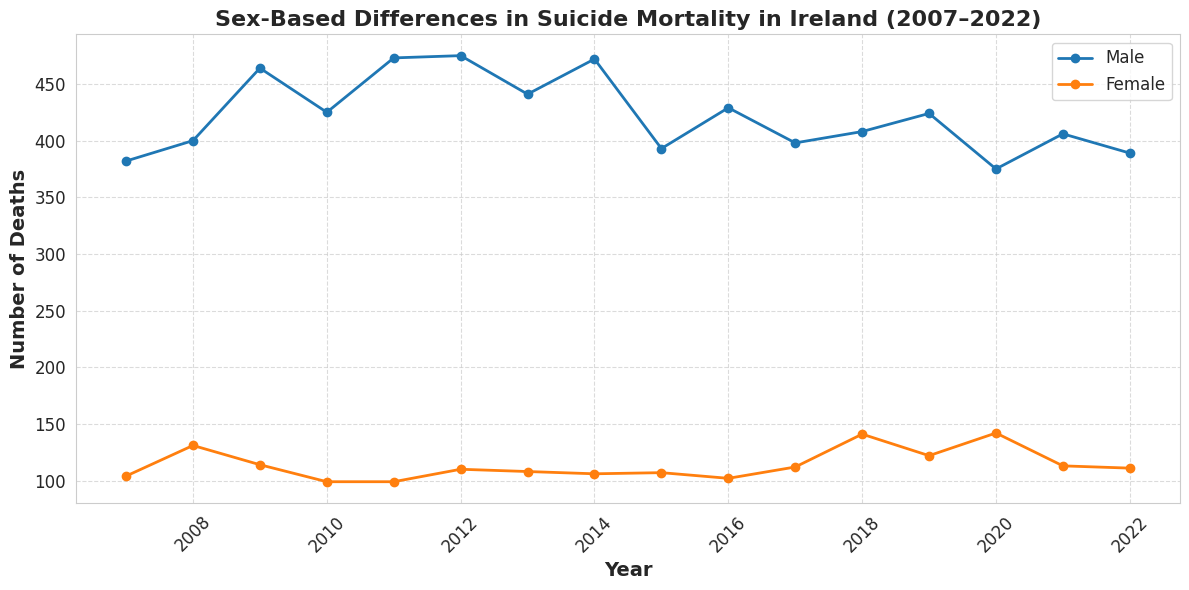

In [245]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(
    sex_mortality_df.index,
    sex_mortality_df["Male"],
    marker="o",
    linewidth=2,
    label="Male",
)

plt.plot(
    sex_mortality_df.index,
    sex_mortality_df["Female"],
    marker="o",
    linewidth=2,
    label="Female",
)

plt.title(
    "Sex-Based Differences in Suicide Mortality in Ireland (2007–2022)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14, weight="bold")
plt.ylabel("Number of Deaths", fontsize=14, weight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

**Calculating the Male-to-Female Mortality Ratio**

To quantify the disparity between sexes, I compute the male-to-female suicide mortality ratio for each year. ([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html).)

In [246]:
sex_mortality_df['male_female_ratio'] = (
    sex_mortality_df['Male'] / sex_mortality_df['Female']
)


sex_mortality_df["male_female_ratio"]


Year
2007    3.673077
2008    3.053435
2009    4.070175
2010    4.292929
2011    4.777778
2012    4.318182
2013    4.083333
2014     4.45283
2015    3.672897
2016    4.205882
2017    3.553571
2018    2.893617
2019     3.47541
2020    2.640845
2021     3.59292
2022    3.504505
Name: male_female_ratio, dtype: Float64

**Visualising the Male-to-Female Suicide Mortality Ratio**

I visualise the male-to-female suicide mortality ratio over time to quantify the scale of sex-based disparities and assess whether the gap narrows or widens across the study period. The parity line at a ratio of 1 represents equal suicide mortality between males and females; values above this line indicate higher male mortality. ([GeeksforGeeks](https://www.geeksforgeeks.org/python/matplotlib-axes-axes-axhline-in-python/)) 

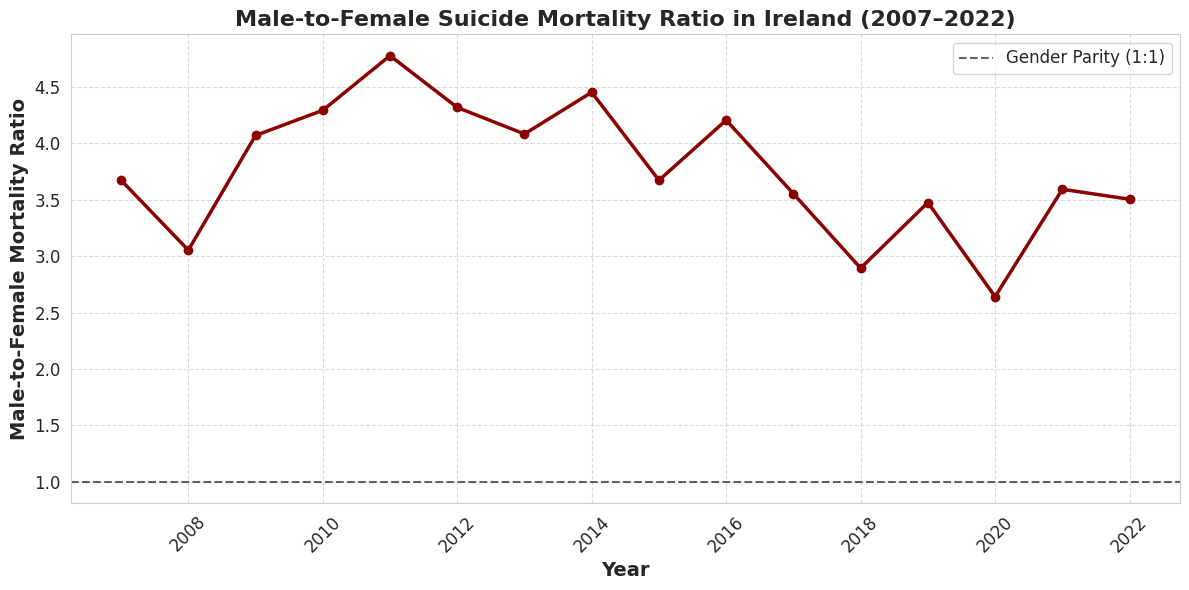

In [247]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(
    sex_mortality_df.index,
    sex_mortality_df["male_female_ratio"],
    marker="o",
    linewidth=2.5,
    color="darkred",
)

plt.axhline(
    y=1,
    linestyle="--",
    color="black",
    alpha=0.6,
    label="Gender Parity (1:1)",
)

plt.title(
    "Male-to-Female Suicide Mortality Ratio in Ireland (2007–2022)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14, weight="bold")
plt.ylabel("Male-to-Female Mortality Ratio", fontsize=14,
           weight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

### **3.1.3 Age Group Distribution of Suicide Mortality**  

I explore which age groups bear the highest and lowest burden of suicide mortality, identifying both at-risk and lower-risk populations.

Research Question:  
Which age groups account for the most and least deaths, and how do their contributions change over time?

### **3.1.4 Age–Sex Interaction Analysis**  

Here I will investigate whether suicide patterns across age groups differ between males and females, highlighting demographic differences in risk.

Research Question:  
Do age-related suicide patterns vary between males and females?

### **3.1.5 Trend Analysis by Age Group**  

Determine whether suicide mortality trends are increasing or decreasing within specific age groups.

Question: Are trends increasing or decreasing within specific age groups?

**Conclusion: National Suicide Mortality Trends**

### **3.2 Regional Analysis**

In [248]:
irish_regional_mortality = pd.read_csv('./data/irish_county_deaths_pivot.csv',
    header=[0,1],  
    index_col=0    
)

irish_regional_mortality.head(5)

County Carlow County Council             Cavan County Council              \
Sex               Both sexes Female Male           Both sexes Female Male   
Year                                                                        
2015                       7      3    4                    7      1    6   
2016                       9      1    8                   16      5   11   
2017                       8      3    5                   12      2   10   
2018                       6      3    3                   14      1   13   
2019                       7      2    5                   13      4    9   

County Clare County Council             Cork City Council  ...  \
Sex              Both sexes Female Male        Both sexes  ...   
Year                                                       ...   
2015                     17      3   14                14  ...   
2016                     15      3   12                24  ...   
2017                     20      2   18                13  ...   
2018                     16      5   11                17  ...   
2019                     14      1   13                20  ...   

County Waterford City & County Council Westmeath County Council              \
Sex                               Male               Both sexes Female Male   
Year                                                                          
2015                                10                        6      2    4   
2016                                15                       13      3   10   
2017                                14                        8      2    6   
2018                                13                       13      3   10   
2019                                 9                       10      3    7   

County Wexford County Council             Wicklow County Council              
Sex                Both sexes Female Male             Both sexes Female Male  
Year                                                                          
2015                       19      3   16                     19      4   15  
2016                       17      2   15                     16      4   12  
2017                       14      1   13                     16      2   14  
2018                       25      8   17                     14      6    8  
2019                       23      3   20                     13      3   10  

[5 rows x 96 columns]

### **3.2.1 County-Level Suicide Mortality Patterns (2015–2022)**

Compare suicide mortality levels across Irish counties.

Question: How does suicide mortality vary across Irish counties?

### **3.2.2 Sex Differences in Suicide Mortality by County**

Assess whether sex-based differences are consistent across counties.

### **3.2.3 County Trend Stability Over Time**

Identify counties with increasing, decreasing, or unstable trends.

**Conclusion:**

## **3.3 🇪🇺 EU Suicide Mortality Analysis**

In [249]:
eu_mortality = pd.read_csv('./data/eu_mortality_rate_2012_2016.csv') 
eu_mortality.head(5)

,YEAR,AT,BE,BG,CY,CZ,DE,DK,EE,EL,...,LU,LV,MT,NL,PL,PT,RO,SE,SI,SK
0,2012,15.163911,18.264900,11.900824,4.176281,15.677584,12.312036,11.844783,17.883864,4.582188,...,9.717006,21.664573,5.987364,10.477965,16.721928,10.190407,12.415409,12.137695,21.406026,10.565618
1,2013,15.274744,17.013866,9.996451,5.215251,14.957981,12.513079,10.887748,16.512975,0.000000,...,7.448249,18.875150,5.219900,11.049148,16.328392,10.024858,12.087867,12.840244,21.662884,11.384562
2,2014,15.432922,16.975469,10.144078,5.116089,14.154687,12.639991,11.177781,18.315589,5.170769,...,12.188910,19.085991,7.473911,10.927378,15.605825,11.709970,11.069161,11.902708,18.825036,10.210584
3,2015,14.548757,16.605451,9.630581,4.646592,13.133079,12.411707,9.965166,14.830363,4.871976,...,11.368521,19.435113,7.748316,11.070530,14.253157,10.889724,11.177291,12.095589,20.456897,0.000000
4,2016,13.769369,16.841838,9.598258,4.167805,12.469391,11.971911,10.109946,13.906367,4.497509,...,7.462052,18.486945,5.337663,11.148988,12.302722,9.461300,9.964280,11.511502,17.973169,7.168852


**Cross-Country Comparison of Suicide Mortality Levels**

Identify countries with consistently higher & lower suicide mortality levels across 2012-2016

**Temporal Trends in EU Suicide Mortality (2012–2016)**

Visualise suicide mortality patterns across EU countries from 2012–2016 to explore overall trends and identify countries with notable increases or decreases.

Research Questions:

How do suicide mortality patterns vary across EU countries over time?

Which countries appear to have rising, falling, or stable trends based on visual inspection?

**Identification of High- and Low-Mortality Outliers**

Detect countries that consistently deviate from the EU average.

**Trend Direction Classification by Country**  

Quantify the direction of suicide mortality trends in each EU country over 2012–2016 using regression to classify them as increasing, decreasing, or stable.

Which EU countries show increasing, decreasing, or stable suicide mortality trends over the study period?

**Conclusion:**

# END